# Trabalho Nº 2
**Estudante:** Nelson Roldan Condori Colquehuanca
**Trabalho:** Resolver os exemplos "Noisy Gaussian Data" e "Ovarian Cancer Data". Depois disso, use o dataset em https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset e reproduza a análise para esse novo conjunto de dados. Faça uma análise como na seção D (Processing the Data) do artigo em https://ieeexplore.ieee.org/document/9399603 explicando seus resultados. Você deve postar seu notebook, com código, resultados e explicações.

Chamaremos de pacotes que nos auxiliam a chamar as funções que auxiliarão no desenvolvimento deste trabalho.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import os
plt.style.use('fivethirtyeight')

## Primeiro apresentamos os exemplos do livro Data-Driven Science and Engineering: Machine Learning, Dynamical Systems, and Control

**PRIMEIRO EXEMPLO:** Este exemplo encontra-se na pág. 26 "Noisy Gaussian Data" que é um exemplo

Text(0, 0.5, 'y')

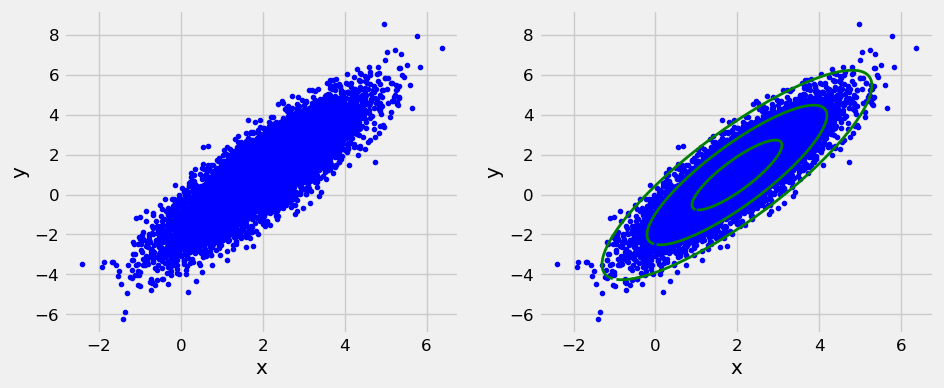

In [6]:
#colors = {'blue': '#3498db', 'green': '#2ecc71', 'Rojo': '#e74c3c',
#          'purple': '#9b59b6', 'orange': '#f39c12', 'background': '#f7f9fc' }
plt.rcParams.update({'font.size': 12})
# Generate noisy cloud of data
xC = np.array([2, 1]) # Center of data (mean)
sig = np.array([2, 0.5]) # Principal axes
theta = np.pi/3 # Rotate cloud by pi/3
R = np.array([[np.cos(theta),-np.sin(theta)], # Rotation mat
              [np.sin(theta),np.cos(theta)]])
nPoints = 10000 # Create 10,000 points
X = R @ np.diag(sig) @ np.random.randn(2,nPoints) + np.diag(xC) @ np.ones((2,nPoints)) 
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ax1.plot(X[0,:],X[1,:], '.', color='blue') # Plot data
ax1.set_xlabel('x')
ax1.set_ylabel('y')
Xavg = np.mean(X,axis=1) # Compute mean
B = X - np.tile(Xavg,(nPoints,1)).T # Mean-subtracted data
# Find principal components (SVD)
U, S, VT = np.linalg.svd(B/np.sqrt(nPoints),full_matrices=0)
theta = 2 * np.pi * np.arange(0,1,0.01)
Xstd = U @ np.diag(S) @ np.array([np.cos(theta),np.sin(theta)])
ax2.plot(X[0,:],X[1,:], '.', color='blue') # Plot data
ax2.plot(Xavg[0] + Xstd[0,:], Xavg[1] + Xstd[1,:],'-',color='green',linewidth=2)
ax2.plot(Xavg[0] + 2*Xstd[0,:], Xavg[1] + 2*Xstd[1,:],'-',color='green',linewidth=2)
ax2.plot(Xavg[0] + 3*Xstd[0,:], Xavg[1] + 3*Xstd[1,:],'-',color='green',linewidth=2)
ax2.set_xlabel('x')
ax2.set_ylabel('y')

**SEGUNDO EXEMPLO:** Este exemplo é excelente porque demonstra de maneira prática uma das aplicações mais poderosas do PCA: reduzir a dimensionalidade de dados massivos para tornar visível sua estrutura subjacente. O fato de que pacientes com e sem câncer formem agrupamentos distintos em um espaço de apenas três dimensões (em vez das 4000 originais) é notável. Isso não apenas valida a utilidade do PCA para extrair características relevantes, mas também sugere que existe uma "assinatura genética" discernível associada ao câncer de ovário.

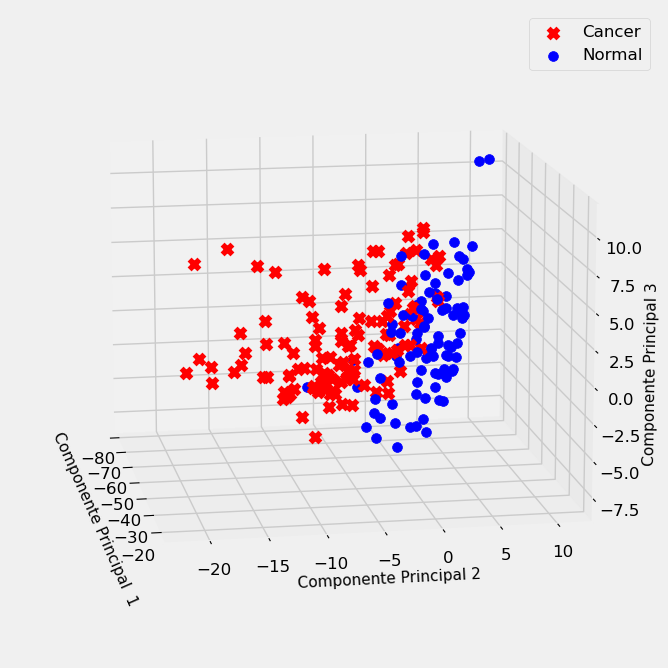

In [8]:
obs = np.loadtxt(os.path.join('..','DATA','ovariancancer_obs.csv'),delimiter=',')
f = open(os.path.join('..','DATA','ovariancancer_grp.csv'),"r")
#http://localhost:8888/lab/tree/Downloads/DATA/ovariancancer_obs.csv
grp = f.read().split("\n")
U, S, VT = np.linalg.svd(obs,full_matrices=0)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for j in range(obs.shape[0]):
    xproj = VT[0,:] @ obs[j,:].T
    yproj = VT[1,:] @ obs[j,:].T
    zproj = VT[2,:] @ obs[j,:].T
    x=1 * xproj
    y=1 * yproj
    z=-1 * zproj
    if grp[j] == 'Cancer':
        ax.scatter(x,y,z,marker='x',color='r',s=50, label='Cancer' if 'Cancer' not in plt.gca().get_legend_handles_labels()[1] else "")
    else:
        ax.scatter(x,y,z,marker='o',color='b',s=50, label='Normal' if 'Normal' not in plt.gca().get_legend_handles_labels()[1] else "")
# --- 5. Finalize the Plot ---
ax.set_xlabel('Componente Principal  1', fontsize=11)
ax.set_ylabel('Componente Principal 2', fontsize=11)
ax.set_zlabel('Componente Principal 3', fontsize=11)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='upper left', fontsize=11)
ax.view_init(elev=13., azim=-10, roll=0)
ax.legend()
plt.show()

## Análise da seção D (Processing the Data) do artigo em https://ieeexplore.ieee.org/document/9399603

Mostramos o Processamento de Dados do Artigo (https://ieeexplore.ieee.org/document/9399603): Primeiro apresentamos um exemplo de como podemos realizar a análise utilizando as bibliotecas *sklearn* com a função PCA, que utiliza fundamentalmente a Decomposição em Valores Singulares (SVD) para reduzir a dimensionalidade dos dados.

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

No seguinte código, vemos que se cria uma função create_pca_df:

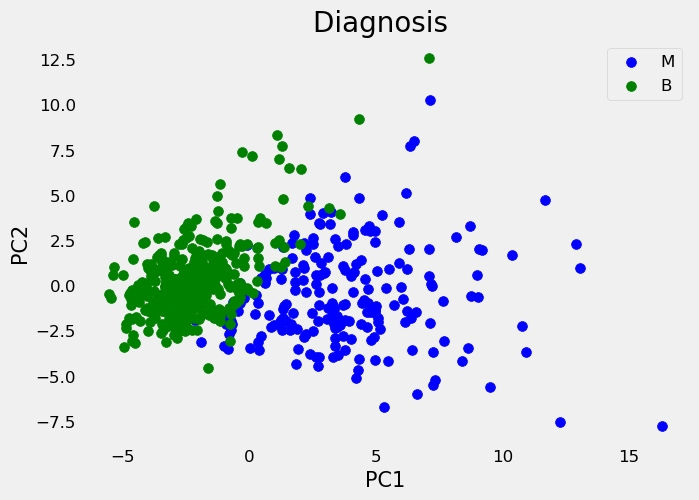

In [13]:
df = pd.read_csv('../DATA/breast-cancer.csv')
y = df["diagnosis"]
X = df.drop(["diagnosis", "id"], axis=1)
def create_pca_df(X, y):
    X = StandardScaler().fit_transform(X)
    pca = PCA(n_components=2)
    pca_fit = pca.fit_transform(X)
    pca_df = pd.DataFrame(data=pca_fit, columns=['PC1', 'PC2'])
    final_df = pd.concat([pca_df, pd.DataFrame(y)], axis=1)
    return final_df
pca_df = create_pca_df(X, y)
def plot_pca(dataframe, target):
    fig = plt.figure(figsize=(7, 5))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel('PC1', fontsize=15)
    ax.set_ylabel('PC2', fontsize=15)
    ax.set_title(f'{target.capitalize()} ', fontsize=20)
    targets = list(dataframe[target].unique())
    colors = random.sample(['r', 'b', "g", "y"], len(targets))
    for t, color in zip(targets, colors):
        indices = dataframe[target] == t
        ax.scatter(dataframe.loc[indices, 'PC1'], dataframe.loc[indices, 'PC2'], c=color, s=50)
    ax.legend(targets)
    ax.grid()
    plt.show()
plot_pca(pca_df, "diagnosis")

A figura anterior é a imagem do artigo, isso faz entender que devemos obter esse mesmo resultado.

Penso que este é um caso de uso paradigmático para o PCA em bioinformática. Com este modelo, logramos a simplificação, ou seja, transformamos um problema aparentemente intratável (visualizar 4000 variáveis) em um compreensível (2 componentes principais). Também revela padrões evidentes, isto é, uma separação entre classes (doente vs. saudável) que estava oculta no ruído da alta dimensionalidade.

Com o objetivo de obter o resultado, primeiro executamos o código "Datos de Cáncer de Ovario" para este dataset, e o que obtemos é o seguinte:

Tentamos extrair 3 componentes principais, então este é o primeiro resultado:

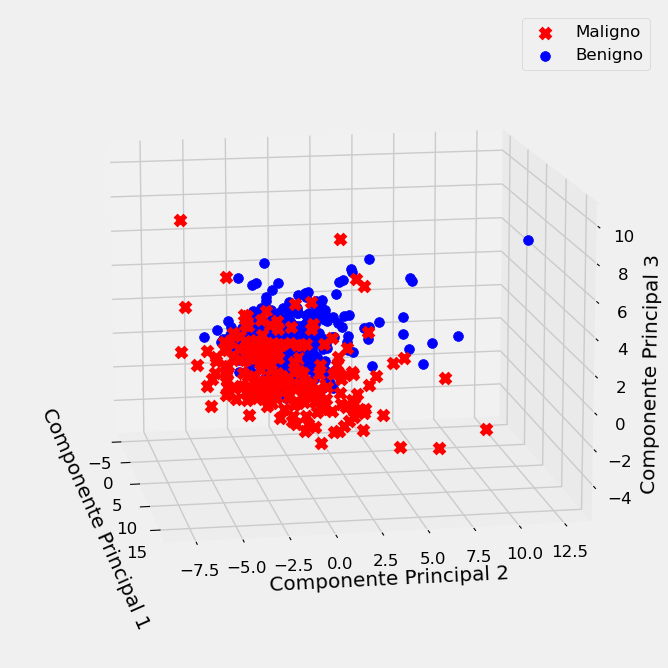

In [18]:
df = pd.read_csv('../DATA/breast-cancer.csv')
labels = df['diagnosis']
features_df = df.drop(['id', 'diagnosis'], axis=1)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_df)
# --- 4. Realizar SVD sobre los datos ESCALADOS ---
U, S, VT = np.linalg.svd(features_scaled, full_matrices=0)

# --- 5. Configurar el Gráfico 3D ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for j in range(features_scaled.shape[0]):
    xproj = VT[0, :] @ features_scaled[j, :].T
    yproj = VT[1, :] @ features_scaled[j, :].T
    z = VT[2, :] @ features_scaled[j, :].T
    x=-1 * xproj
    y=-1 * yproj
    if labels[j] == 'M':
        ax.scatter(x, y, z, marker='x', color='red', s=50, label='Maligno' if 'Maligno' not in ax.get_legend_handles_labels()[1] else "")
    else:
        ax.scatter(x, y, z, marker='o', color='blue', s=50, label='Benigno' if 'Benigno' not in ax.get_legend_handles_labels()[1] else "")
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
ax.view_init(elev=13., azim=-10, roll=0)
ax.legend()
plt.show()

Para o seguinte resultado, são extraídos apenas 2 componentes, mas vale comentar que podem ocorrer alguns problemas na obtenção do gráfico. No entanto, o código é eficiente. Então, observou-se que o gráfico é evidentemente o mesmo, com a diferença de que os vetores singulares estão em direção oposta, ou seja, os valores apresentaram sinais contrários aos reais.

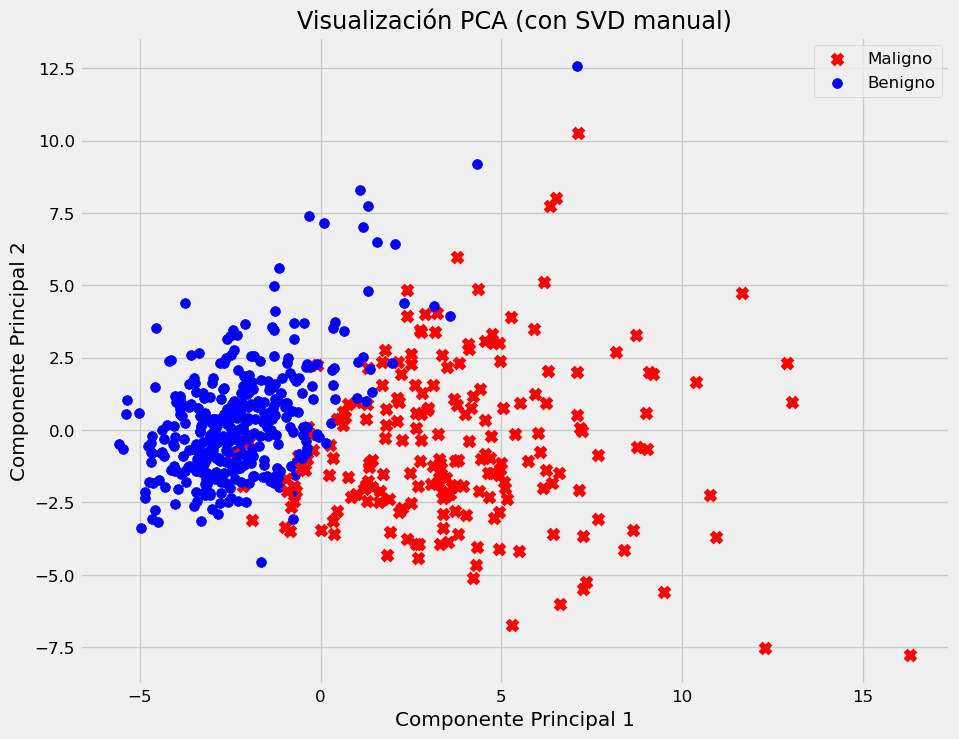

In [20]:
# --- Carga y preparación de datos (esto ya está correcto) ---
df = pd.read_csv('../DATA/breast-cancer.csv')
labels = df['diagnosis']
features_df = df.drop(['id', 'diagnosis'], axis=1)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_df)

# --- Realizar SVD sobre los datos ESCALADOS ---
U, S, VT = np.linalg.svd(features_scaled, full_matrices=0)

# --- Configurar el gráfico ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1,1, 1)

# --- Proyectar y graficar los datos ---
for j in range(features_scaled.shape[0]):
    # Proyectar los datos sobre los componentes principales
    proj_x = VT[0, :] @ features_scaled[j, :]
    proj_y = VT[1, :] @ features_scaled[j, :]
    
    # --- !! LA CORRECCIÓN ESTÁ AQUÍ !! ---
    # Invertimos el signo para alinear los resultados con el estándar.
    x = -1 * proj_x
    y = -1 * proj_y
    
    if labels[j] == 'M':
        ax.scatter(x, y, marker='x', color='red', s=50, label='Maligno' if 'Maligno' not in ax.get_legend_handles_labels()[1] else "")
    else:
        ax.scatter(x, y, marker='o', color='blue', s=50, label='Benigno' if 'Benigno' not in ax.get_legend_handles_labels()[1] else "")

# --- Finalizar el Gráfico ---
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_title('Visualización PCA (con SVD manual)')
ax.legend()
ax.grid(True)
plt.show()

## Análise dos Resultados:
 
<div class="alert alert-info">
     
<ul>
  <li>O PCA permite reduzir significativamente a dimensionalidade dos dados.</li>
  <li>Os primeiros componentes principais capturam a maior parte da variância dos dados.</li>
  <li>Podemos visualizar os dados em 2D ou 3D mantendo a estrutura essencial dos dados. </li>
    <li>A separação entre classes torna-se visível no espaço reduzido</li>
</ul> 




</div>